# Deep Learning Using R with keras

n this notebook, we will walk through how to use the keras R package for a toy example in deep learning with the hand written digits image dataset (i.e. MNIST). The purpose of the notebook is to have hands-on experience and get familar with the deep learning overview part of the training course. Please check the keras R package website for most recent development: https://keras.rstudio.com/

We are using databrick community edition with R as the interface for this deep learning training for audience with statistics background with the following consideration:

- Minimum language barrier in coding for most statisticians
- Zero setup to save time using cloud envriment
- Get familar with current trend of cloud computing in coorprate setup

# 1 Packages Download and Installation
In this example notebook, the keras R package is needed. As it has a many dependent packages to be download and install, it takes a few minutes to finish. Be patient! In a production cloud enviroment such as the paid version of Databricks, you can save what you have and resume from where you left. But in this free community edition of Databrics, we have to download and install needed packages everytime a new cluster is created or after every log in.

## 1.1 Download keras
The keras package is published to CRAN at 2018-04-29 and we can get it through CRAN by calling install.packages("keras"). As it is still in fast development stage, we can also get it directly from github for most recently update that might not be pushed to CRAN yet. Again, be patient, the following cell may take a few minutes to finish installing all dependencies.

```
install.package("keras")
```

## 1.2 Load keras package and the requried tensorflow backend
As keras is just an interface to popular deep learning frameworks, we have to install a specfic deep learning backend. The default and recommended backend is TensorFlow. By calling install_keras(), it will install all the needed dependencies for TensorFlow. The following cell takes around one minute to run.

In [2]:
library(keras)
install_keras()

Creating virtualenv for TensorFlow at  ~/.virtualenvs/r-tensorflow 
Installing TensorFlow ...

Installation complete.



Now we are all set to explore deep learning! As simple as three lines of R code, but there are quite a lot going on behind the scene. One of the advantage of cloud enviroment is that we do not need to worry about these behind scene setup and maintenance.

# 2 Overview for MNIST Dataset
In deep learning, one of the first sucessfuly application that is better than traditonal machine learning areas is image recognition. We will use the widely used MNIST handwritten digit image dataset for this tutorial. More information about the dataset and benchmark results from various machine learning methods can be found at: http://yann.lecun.com/exdb/mnist/ and https://en.wikipedia.org/wiki/MNIST_database

## 2.1 Load MNIST dataset
This dataset is already included in the keras/tensorflow installation and we can simply load the dataset as described in the following cell. It takes less than a minute to load the dataset.

In [3]:
mnist <- dataset_mnist()

## 2.2 Training and testing datasets
The data structure of the MNIST dataset is straight forward and well prepared for R, which has two pieces: (1) training set: x (i.e. features): 60000x28x28 tensor which corresponds to 60000 28x28 pixel images with grey scale representation (i.e. all the values are integer between 0 and 255 in each 28x28 matrix), and y (i.e. responses): a length 60000 vector which contains the corresponding digits with integer values between 0 and 9. (2) testing set: same as the training set, but with only 10000 images and responses. Detailed structure for the dataset can be seen with str(mnist) below.

In [4]:
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


Now we prepare the features (x) and response variable (y) for both the training and testing dataset, and we can check the structure of the x_train and y_train using str() function.

In [5]:
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

str(x_train)
str(y_train)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...


## 2.3 Plot an image
Now let's plot a chosen 28x28 matrix as an images using R's image() function. In R's image() function, the way of showing an image is rotated 90 degree from the matrix representation. So there is additonal steps to rearrange the matrix such that we can use image() function to show it in the actual orientation.

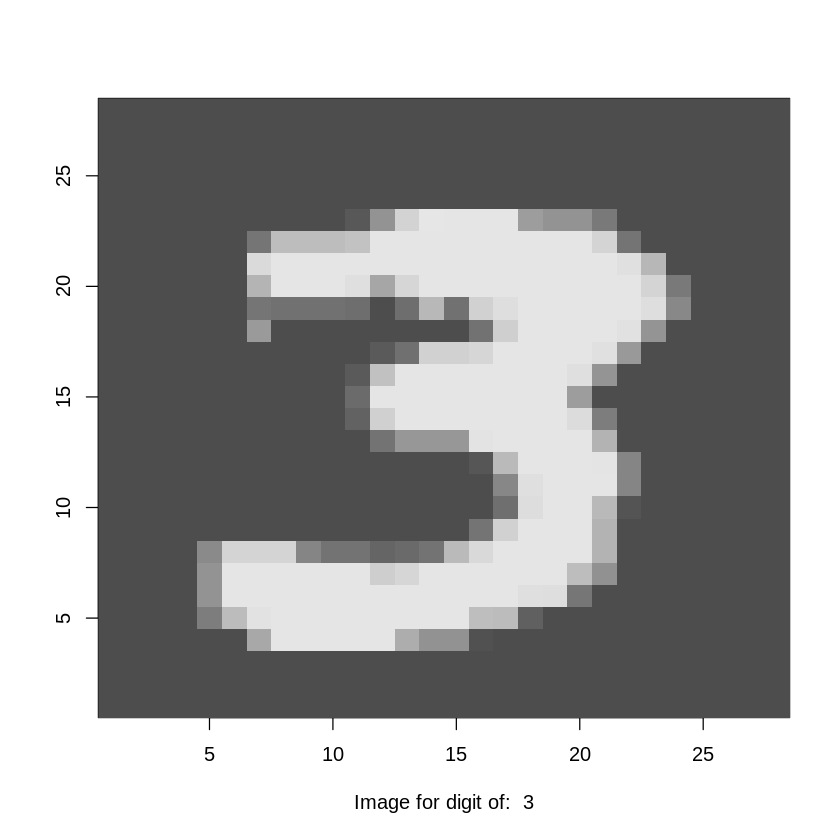

In [6]:
index_image = 28 ## change this index to see different image.
input_matrix <- x_train[index_image,1:28,1:28]
output_matrix <- apply(input_matrix, 2, rev)
output_matrix <- t(output_matrix)
image(1:28, 1:28, output_matrix, col=gray.colors(256), xlab=paste('Image for digit of: ', y_train[index_image]), ylab="")

Here is the original 28x28 matrix for the above image:

In [7]:
input_matrix

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,80,80,44,0,0,0,0,0,0,0
0,0,0,0,0,0,39,158,158,158,⋯,253,253,210,38,0,0,0,0,0,0
0,0,0,0,0,0,226,253,253,253,⋯,253,253,253,241,146,0,0,0,0,0
0,0,0,0,0,0,139,253,253,253,⋯,253,253,253,253,210,43,0,0,0,0
0,0,0,0,0,0,39,34,34,34,⋯,253,253,253,253,236,64,0,0,0,0
0,0,0,0,0,0,91,0,0,0,⋯,253,253,253,244,81,0,0,0,0,0


# 3 Feedforward Deep Neural Networking Model
There are multiple deep learning methods to solve the handwritten digits problem and we will start from the simpler and more generic deep learning model using feedforward dee neural network (DNN). DNN contains a few of fully connected layers and information is flowing from a front layer to a back layer without any feedback loop from the back layer to front layer. It is the most common deep learning models to start with. In this section, we will walk through all the needed steps to train a DNN model from scratch.

## 3.1 Data preprocessing
In this section, we will walk through the needed steps of data preprocessing for feedforward DNN modles. For the MNIST dataset that we just loaded, some preprocessing has already done as mentioned in the above reference links. So we have a relatively "clean" data, but before we feed the data into feedforward DNN framework, we still need to do some additional preparations.

First, for each digits, we have a scalar response and a 28x28 integer matrix with value between 0 and 255. To use the out of box DNN functions, for each response, all the features are one row of all features. For an image in MNIST dataet, the input for one response y is a 28x28 matrix, not a single row of many columns and we need to convet the 28x28 matrix into a single row by appending every row of the matrix to the first row using reshape() function.

In addition to reshape, we also need to scale all features to be between (0, 1) or (-1, 1) or close to (-1, 1) range. Scale or normalize every feature will improve numerical stability in the optimization procedure as there are a lot of parameters to be optimized in DNN models.

### 3.1.1 Reshape and rescale
We first reshape the 28x28 image for each digit (i.e each row) into 784 columns (i.e. features), and then rescale the value to be between 0 and 1 by dividing the origial grey scale value by 255, as described in the cell below.

In [8]:
# step 1: reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

# step 2: rescale
x_train <- x_train / 255
x_test <- x_test / 255

And here is the structure of the reshaped and rescaled features for training and testing dataset. Now for each digit, there are 784 columns of features.

In [9]:
str(x_train)
str(x_test)

 num [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
 num [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...


### 3.1.2 Make y categorical variable
In this example, even though the response variable is integer (i.e. the corresponding digits for an image), but there is no order or rank for these integers and they are just an indication of one of the 10 categories. So we also convert the response variable y into categorial.

In [10]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)
str(y_train)

 num [1:60000, 1:10] 0 1 0 0 0 0 0 0 0 0 ...


## 3.2 Fit a deep learning model
Now we are ready to fit a deep learning model with y and x. It is actually pretty straight forward to build a deep neural network model using keras. For this example, the number of input features is 784 (i.e. scaled value of each pixcel in the 28x28 image) and the number of class for the output is 10 (i.e. one of the ten categories for digits). So the input to the first layer of a neural network is 784 and the output from the last layer of a netural network is 10. And we can add any number of compatible layers in between.

### 3.2.1 Define a neural network structure
In keras, it is easy to define a DNN model: (1) use keras_model_sequential() to initiate a model placehoder and all model structures are attached to this model object, (2) layers are added in sequency by calling the layer_dense() function, (3) we can add arbitary layers to the model based o the sequence of calling layer_dense(). For dense layes, all the nodes from the previous layer are connected with each and every nodes to the next layer. In layer_dense() function, we can define how many nodes in that layer through the 'units' parameter. The activation function can be defined through the 'activation' parameter. For the first layer, we also need to define the input features' dimension through 'input_shape' parameter. For our preprocessed MNIST dataset, there are 784 columns in the input data. One of the wildly used way to reduce overfitting is to use the dropout method, which randomly drops certain propotion of the nodes in a layer. We can define the dropout propotion through layer_dropout() function immediately after the layer_dense() function.

In [11]:
dnn_model <- keras_model_sequential() 
dnn_model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

The above dnn_model has 4 layers with first layer 256 nodes, 2nd layer 128 nodes, 3rd layer 64 nodes, and last layer 10 nodes. The activation function for the first 3 layers is 'relu' and the activation function for the last layer is 'softmax' which is typical for classfication problems. The model detail can be obtained through summary() function. The number of parameter of each layer can be calculated as: (number of input features +1) times (numbe of nodes in the layer). For example, the first layer has (784+1)x256=200960 parameters; the 2nd layer has (256+1)x128=32896 parameters. Please note, dropout only randomly drop certain proportion of parameters for each batch, it will not reduce the number of parameters in the model. The total number of parameters for the dnn_model we just defined has 242762 parameters to be estimated.

In [12]:
summary(dnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dropout_3 (Dropout)         

### 3.2.2 Compile the model
Once a model is defined, we need to compile the model with a few other hyper-parameters including: (1) what loss function to use, (2) what optimizer to use, and (3) what metrics to track during the training. For multi-class classfiction problems, the 'categorical_crossentropy' is common to use, and 'optimizer_rmsprop()' is commonly used as teh optimizer which performs batch gradient dececent.

In [13]:
dnn_model %>% compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer_rmsprop(),
    metrics = c('accuracy')
)

### 2.2.3 Train the neural network model
Now we can feed data (x and y) into the neural network that we just built to estimate all the parameters in the model. Here we define three hyperparameters: epochs, batch_size and validation_split, for this specfic model. It just takes a couple of minutes to finish.

In [14]:
dnn_history <- dnn_model %>% fit(
    x_train, y_train, 
    epochs = 15, 
    batch_size = 128, 
    validation_split = 0.2
)

There are some useful information stored in the output object dnn_history and the details can be shown by using str() function. We can plot the training and validation accuracy and loss as function of epoch by simply calling plot(dnn_history).

In [15]:
str(dnn_history)

List of 2
 $ params :List of 8
  ..$ metrics           : chr [1:4] "loss" "acc" "val_loss" "val_acc"
  ..$ epochs            : int 15
  ..$ steps             : NULL
  ..$ do_validation     : logi TRUE
  ..$ samples           : int 48000
  ..$ batch_size        : int 128
  ..$ verbose           : int 1
  ..$ validation_samples: int 12000
 $ metrics:List of 4
  ..$ acc     : num [1:15] 0.834 0.931 0.948 0.955 0.961 ...
  ..$ loss    : num [1:15] 0.542 0.244 0.187 0.163 0.141 ...
  ..$ val_acc : num [1:15] 0.947 0.96 0.967 0.97 0.968 ...
  ..$ val_loss: num [1:15] 0.183 0.14 0.119 0.108 0.123 ...
 - attr(*, "class")= chr "keras_training_history"


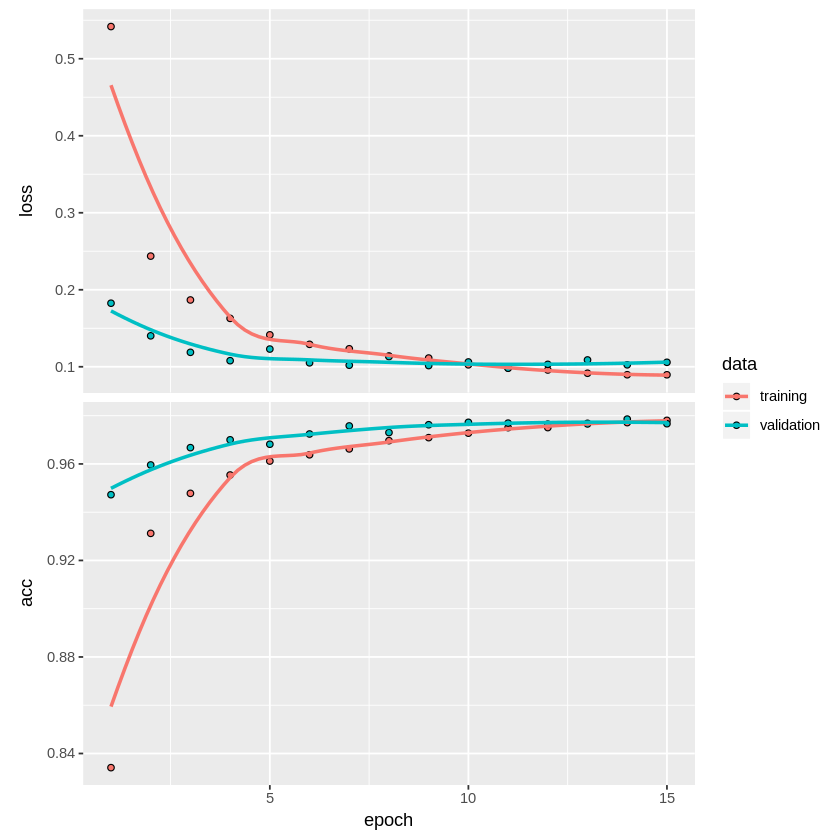

In [16]:
plot(dnn_history)

## 3.3 Prediction

In [17]:
dnn_model %>% evaluate(x_test, y_test)

$loss
[1] 0.09619398

$acc
[1] 0.9778

In [18]:
dnn_pred <- dnn_model %>% predict_classes(x_test)
head(dnn_pred, n = 50)

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1
[39] 3 1 1 7 4 2 3 5 1 2 4 4

## 3.4 Check a few mis-clascified images

Number of mis-classfied images can be found using the below cell. And we can plot these mis-classfied images to see whether a human can correctly read it out.

In [19]:
## total number of mis-classcified images
sum(dnn_pred != mnist$test$y)

[1] 222

In [20]:
missed_image = mnist$test$x[dnn_pred != mnist$test$y,,]
missed_digit = mnist$test$y[dnn_pred != mnist$test$y]
missed_pred = dnn_pred[dnn_pred != mnist$test$y]


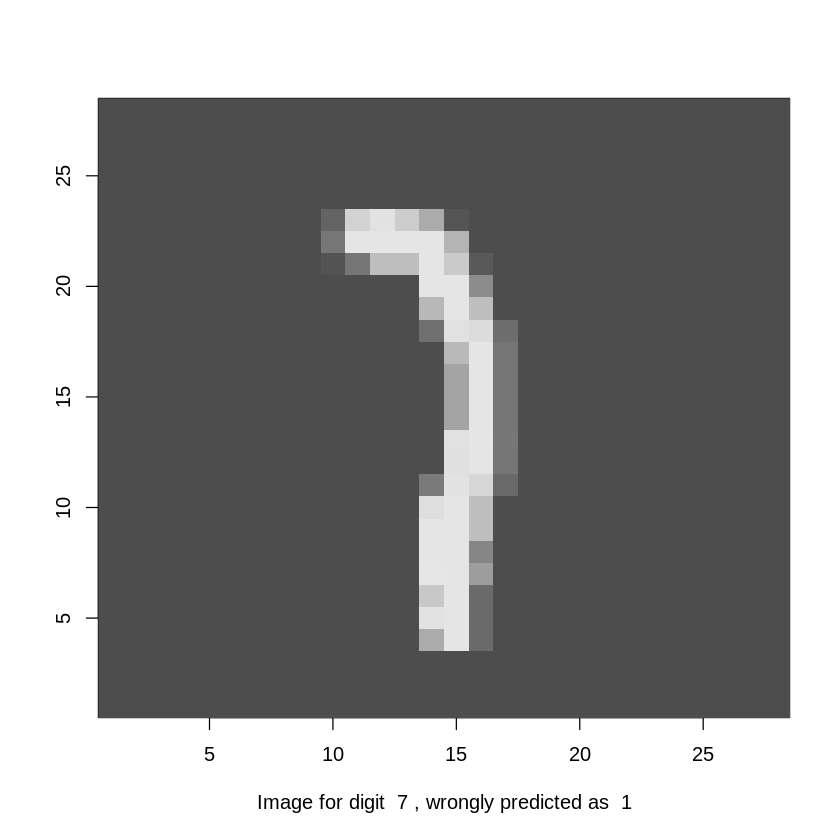

In [21]:
index_image = 34 ## change this index to see different image.
input_matrix <- missed_image[index_image,1:28,1:28]
output_matrix <- apply(input_matrix, 2, rev)
output_matrix <- t(output_matrix)

image(1:28, 1:28, 
      output_matrix, 
      col=gray.colors(256), 
      xlab=paste(
          'Image for digit ', 
          missed_digit[index_image], 
          ', wrongly predicted as ', 
          missed_pred[index_image]), 
      ylab="")

Now we finsh this simple tutorial of using deep neural network for handwritten digit recognition using MNIST dataset. We illustrate how to reshape the original data into the right format and scaling; how to define a deep neural network with arbitary number of layers; how to choose activation function, optimizer and loss function; how to use dropout to limit overfitting; how to setup hyperparameters; and how to fit the model and using a fitted model to predict. Finally we illustrate how to plot the accuracy/loss as functions of epoch. It show the end-to-end cycle of how to fit a deep neural network model.

On the other hand, image can be better dealt with Convolutional Neural Network (CNN) and we are going to walk through the exact same problem using CNN in next section.